# New section

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
save_dir = "/content/gdrive/MyDrive/Handwritten_Character_Recognition"
os.makedirs(save_dir, exist_ok=True)

In [ ]:
!pip install emnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from emnist import extract_training_samples
from emnist import extract_test_samples
from keras.utils import to_categorical

In [ ]:
X_train, y_train = extract_training_samples('byclass')
X_test, y_test = extract_test_samples('byclass')

X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train = np.expand_dims(X_train, axis=3) # Add the number of channels
X_test = np.expand_dims(X_test, axis=3)

y_train = to_categorical(y_train, num_classes=62)
y_test = to_categorical(y_test, num_classes=62)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Augment data to get a better accuracy over unseen data which may have different orientaion
train_data_generator = ImageDataGenerator(rotation_range = 15, width_shift_range = 0.10, height_shift_range = 0.10)
train_data_generator.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))

validation_data_generator = ImageDataGenerator()
validation_data_generator.fit(X_test.reshape(X_test.shape[0], 28, 28, 1))

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation=tf.nn.leaky_relu, input_shape=(28, 28, 1), padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.leaky_relu))
model.add(tf.keras.layers.Dense(62, activation = tf.nn.softmax))

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_generator.flow(X_train, y_train, batch_size=1000), validation_data=validation_data_generator.flow(X_test, y_test, batch_size=32), epochs=10)


Epoch 1/10
698/698 [==============================] - 1053s 2s/step - loss: 0.9550 - accuracy: 0.7163 - val_loss: 0.4842 - val_accuracy: 0.8325
Epoch 2/10
698/698 [==============================] - 1052s 2s/step - loss: 0.5474 - accuracy: 0.8137 - val_loss: 0.4305 - val_accuracy: 0.8467
Epoch 3/10
698/698 [==============================] - 1057s 2s/step - loss: 0.4910 - accuracy: 0.8285 - val_loss: 0.4085 - val_accuracy: 0.8521
Epoch 4/10
698/698 [==============================] - 1018s 1s/step - loss: 0.4631 - accuracy: 0.8360 - val_loss: 0.4014 - val_accuracy: 0.8545
Epoch 5/10
698/698 [==============================] - 1017s 1s/step - loss: 0.4446 - accuracy: 0.8413 - val_loss: 0.3870 - val_accuracy: 0.8579
Epoch 6/10
461/698 [==================>...........] - ETA: 5:28 - loss: 0.4356 - accuracy: 0.8435

KeyboardInterrupt: ignored

In [ ]:
# Plotting accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

# Plotting loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()

NameError: ignored

In [ ]:
model.save(os.path.join(save_dir, 'emnist_OCR'))

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/Handwritten_Character_Recognition/emnist_OCR.h5')

In [ ]:
def generate_image(character):
    if character.isdigit():
        digit_index = int(character)
        input_image = X_train[y_train[:, digit_index] == 1][0]
        true_label = digit_index
    elif character.isalpha():
        letter_index = ord(character.lower()) - 97 + 10  # Adjust index for letters
        input_image = X_train[y_train[:, letter_index] == 1][0]
        true_label = letter_index
    else:
        print("Invalid input! Please provide a digit (0-9) or a letter (A-Z).")
        return None, None

    return input_image, true_label

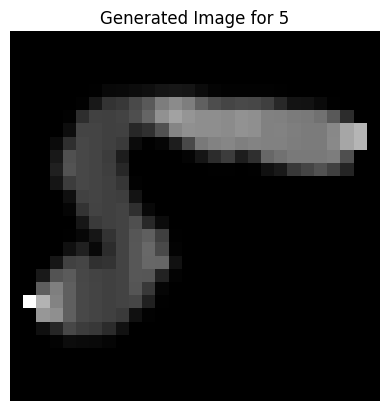

In [ ]:
input_character = '5'
generated_image, true_label = generate_image(input_character)

if generated_image is not None:
    plt.imshow(generated_image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f'Generated Image for {input_character}')
    plt.show()

In [ ]:
# Reshape the input image to match the model's input shape
input_image = np.expand_dims(generated_image, axis=0)

predicted_probabilities = model.predict(input_image)
predicted_label = np.argmax(predicted_probabilities)

if predicted_label < 10:
    predicted_character = str(predicted_label)
else:
    predicted_character = chr(predicted_label + 55)  # Adjust index for letters

if true_label == predicted_label:
    print("The model predicted the label correctly!")
else:
    print("The model predicted the label incorrectly.")

print(f"True Label: {input_character}, Predicted Label: {predicted_character}")


1/1 [==============================] - 0s 23ms/step
The model predicted the label correctly!
True Label: 5, Predicted Label: 5
